In [1]:
import pandas as pd
from textblob import TextBlob
from src.plot import plot_feature_histogram, plot_wordcloud, plot_top_words_barchart

In [2]:
news = pd.read_csv("../data/raw/WELFake_Dataset.csv")
news.head(3)

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1


In [3]:
news = news.rename(columns={"Unnamed: 0":"id","label":"is_fake"}).astype({"title":"string","text":"string"})
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72134 entries, 0 to 72133
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       72134 non-null  int64 
 1   title    71576 non-null  string
 2   text     72095 non-null  string
 3   is_fake  72134 non-null  int64 
dtypes: int64(2), string(2)
memory usage: 2.2 MB


In [4]:
news["is_fake"].\
    value_counts(normalize=True).\
    rename({0: 'Real', 1: 'Fake'})

is_fake
Fake    0.514404
Real    0.485596
Name: proportion, dtype: float64

In [5]:
news.isnull().sum()

id           0
title      558
text        39
is_fake      0
dtype: int64

In [6]:
news = news.fillna("")
news.isnull().sum()

id         0
title      0
text       0
is_fake    0
dtype: int64

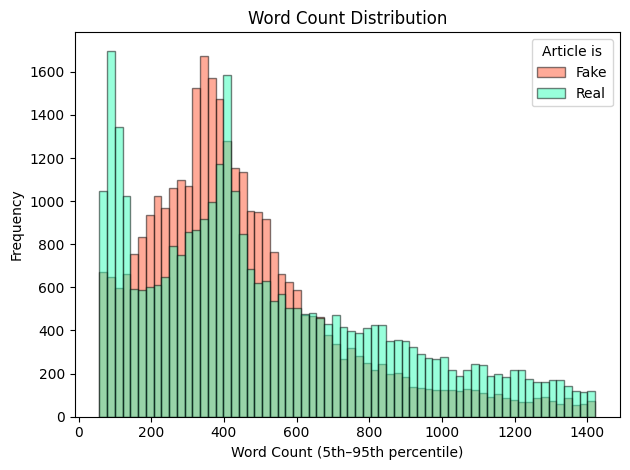

count    72134.000000
mean       551.610711
std        623.936338
min          1.000000
25%        239.000000
50%        410.000000
75%        678.000000
max      24243.000000
Name: word_count, dtype: float64

In [7]:
titles_clean = news["title"].str.replace("\n", "").str.strip()
texts_clean  = news["text"] .str.replace("\n", "").str.strip()

news['word_count'] = titles_clean.str.split().map(len) + texts_clean.str.split().map(len)
plot_feature_histogram(news, 'word_count', "Word Count Distribution", "Word Count")
news['word_count'].describe()

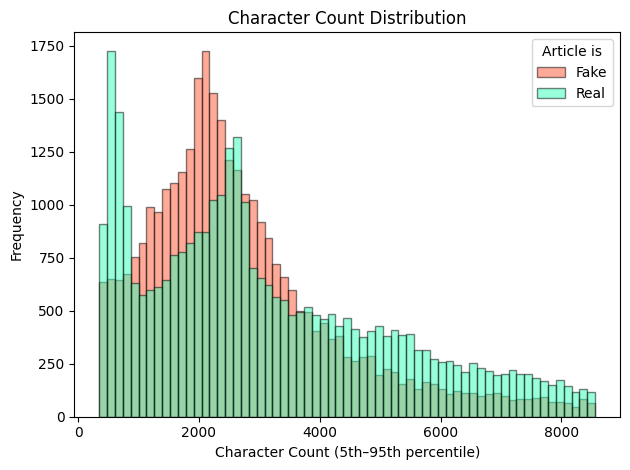

count        72134.0
mean     3340.180068
std      3724.697013
min              1.0
25%           1454.0
50%           2496.0
75%           4132.0
max         142630.0
Name: char_count, dtype: Float64

In [8]:
news["char_count"] = titles_clean.str.len() + texts_clean.str.len()
plot_feature_histogram(news, 'char_count', "Character Count Distribution", "Character Count")
news["char_count"].describe()

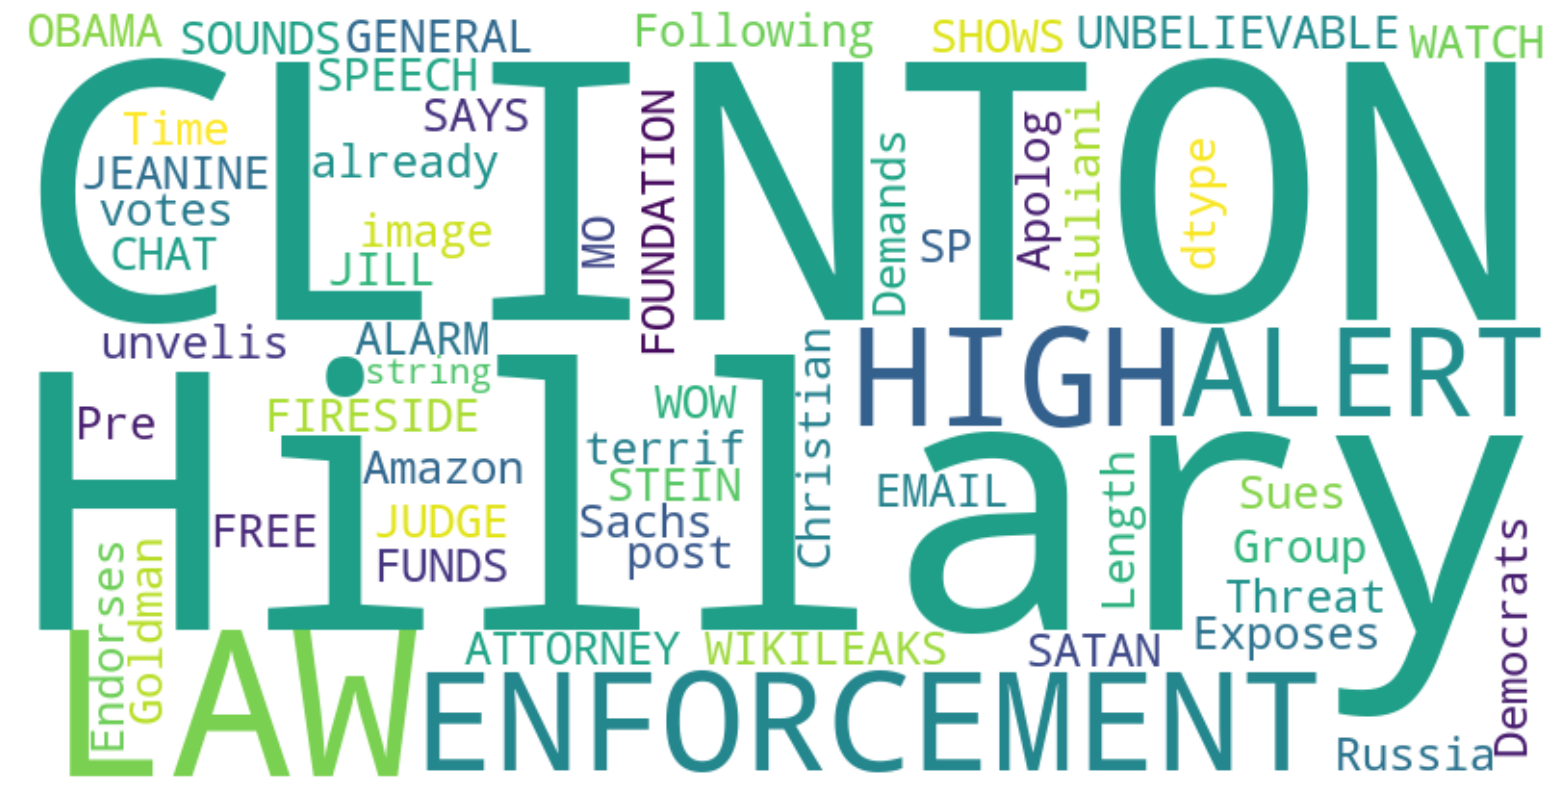

In [9]:
fake_news = news["is_fake"] == 1
plot_wordcloud(news[fake_news]["title"] + news[fake_news]["text"])

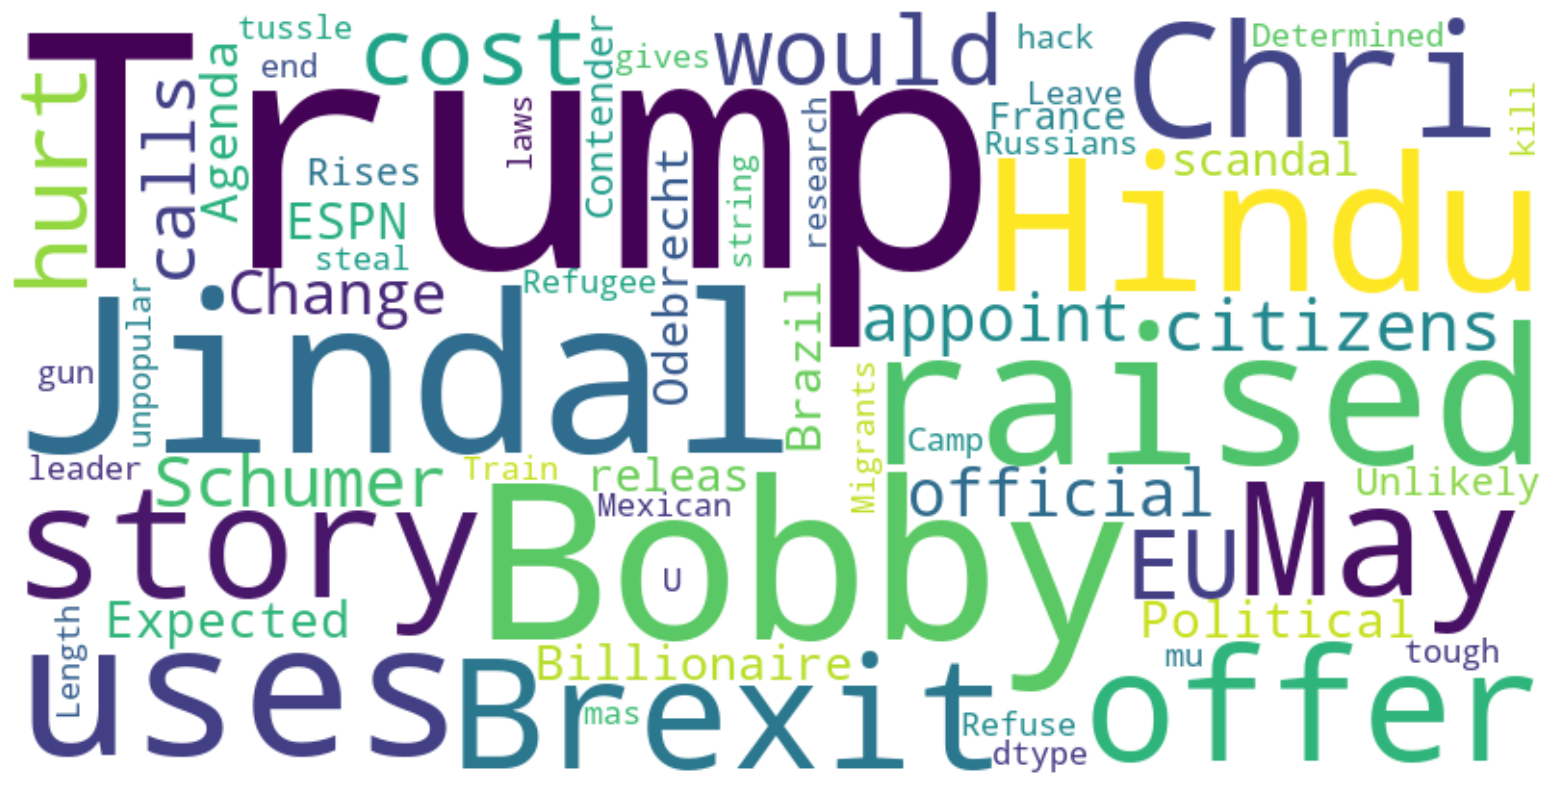

In [10]:
real_news = news["is_fake"] == 0
plot_wordcloud(news[real_news]["title"] + news[real_news]["text"])

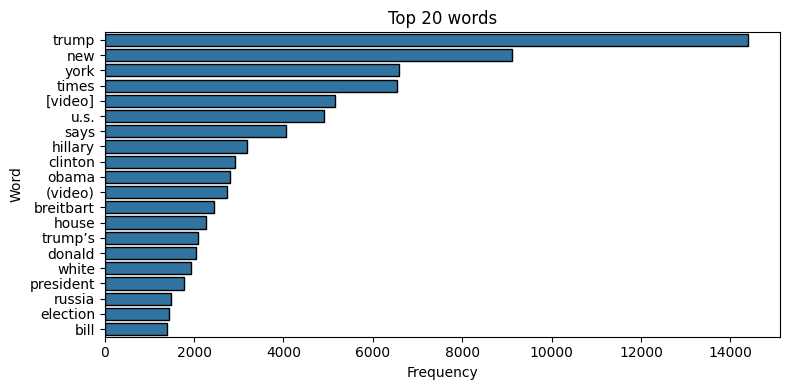

In [11]:
plot_top_words_barchart(news["title"])

In [12]:
def get_sentiment_scores(text):
    sentiment = TextBlob(text).sentiment
    return sentiment.polarity, sentiment.subjectivity

news['title_polarity'], news['title_subjectivity'] = zip(*news['title'].apply(get_sentiment_scores))
news['text_polarity'], news['text_subjectivity'] = zip(*news['text'].apply(get_sentiment_scores))

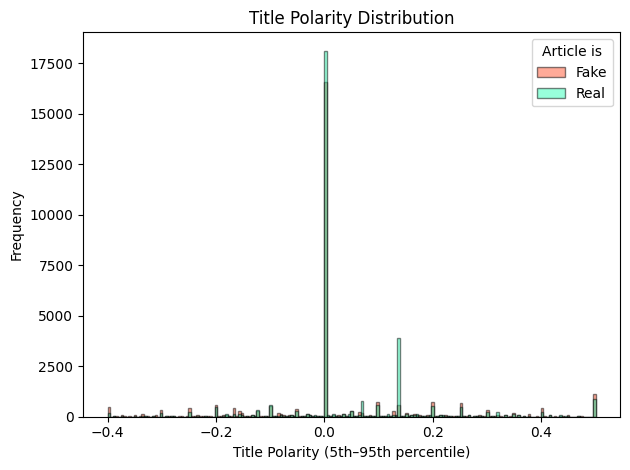

In [13]:
plot_feature_histogram(news, 'title_polarity', "Title Polarity Distribution", "Title Polarity")

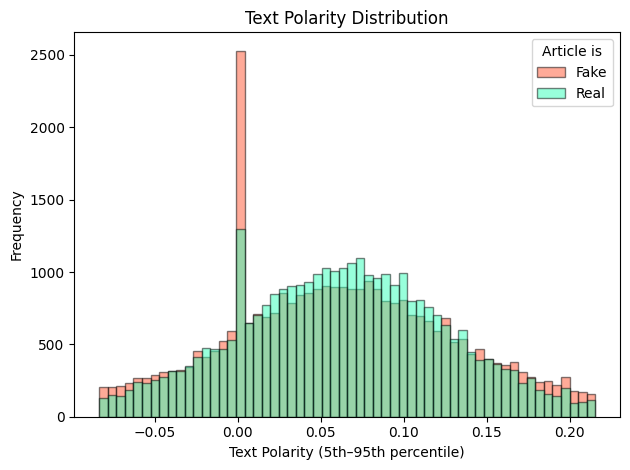

In [14]:
plot_feature_histogram(news, 'text_polarity', "Text Polarity Distribution", "Text Polarity")